# Student Performance Indicator
## Life cycle of a Machine Learning Project

- understanding the problem statement
- data collection
- data checks to perform
- exploratory data analysis (EDA)
- data pre-processing
- model training
- optimal model selection

## 1. Problem Statement

This project understands how a student's performance (test scores) is impacted by other variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course.

## 2. Data Collection

- dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- the data consists of 8 columns and 1000 rows

## 2.1 Import Data and Requird Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn, and Warnings Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Import CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/student_performance.csv')

### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the Dataset

In [4]:
df.shape

(1000, 8)

## Dataset Information

- gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
- parental level of education: parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: if the student had lunch before the test -> (standard or free/reduced)
- test preparation course: if the student completed the course or not before the test
- math score
- reading score
- writing score


## 3. Data Checks to Perform

- Check for missing values
- Check for duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical columns

### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset. If we did have missing values, we would use feature engineering to try to fill them in (imputation).

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicates. If there were, we would use `df.drop_duplicates()`

### 3.3 Check Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


`.info()` checks for nulls and gives the data type for each column

### 3.4 Check # Unique Values per Column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check Dataset Statistics

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

- from the above description of numerical data:
    - all of the means are close to each other – between 66 and 68.05
    - all of the standard deviations are close to each other – between 14.6 and 15.19
    - math score has a minimum of 0, but reading and writing are much higher with a minimum of 17 and 10, respectively

### 3.6 Exploring Data

In [10]:
# end=' ' means that the following print line will be printed on the same line, as opposed to a new line (default end is '\n')
print('Categories in "gender" variable:', end=' ')
print(df['gender'].unique())

print('\nCategories available in "race/ethnicity" variable:', end=' ')
print(df['race/ethnicity'].unique())

print('\nCategories available in "lunch" variable:', end=' ')
print(df['lunch'].unique())

print('\nCategories available in "test preparation course" variable:', end=' ')
print(df['test preparation course'].unique())

print('\nCategories available in "parental level of education" variable:', end=' ')
print(df['parental level of education'].unique())

Categories in "gender" variable: ['female' 'male']

Categories available in "race/ethnicity" variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories available in "lunch" variable: ['standard' 'free/reduced']

Categories available in "test preparation course" variable: ['none' 'completed']

Categories available in "parental level of education" variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [11]:
# define numerical and categorical columns
numeric_cols = [col for col in df.columns if df[col].dtype == 'int64']
categroical_cols = [col for col in df.columns if df[col].dtype == 'object']

print(f'There are {len(numeric_cols)} numerical features:', end=' ')
print(numeric_cols)

print(f'There are {len(categroical_cols)} categorical features:', end=' ')
print(categroical_cols)

There are 3 numerical features: ['math score', 'reading score', 'writing score']
There are 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.7 Feature Engineering: Adding columns for 'Total Score' and 'Average'

In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = (df['total score']/3)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
# count perfect scores
perfect_reading = df[df['reading score'] == 100]['average'].count()
perfect_writing = df[df['writing score'] == 100]['average'].count()
perfect_math = df[df['math score'] == 100]['average'].count()
perfect_all = df[(df['math score'] == 100) & (df['reading score'] == 100) & (df['writing score'] == 100)]['average'].count()

print(f'Number of students with a perfect reading score: {perfect_reading}')
print(f'Number of students with a perfect writing score: {perfect_writing}')
print(f'Number of students with a perfect math score: {perfect_math}')
print(f'Number of students with a perfect score in all three categories: {perfect_all}')

Number of students with a perfect reading score: 17
Number of students with a perfect writing score: 14
Number of students with a perfect math score: 7
Number of students with a perfect score in all three categories: 3


In [14]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()
all_less_20 = df[(df['reading score'] <= 20) & (df['writing score'] <= 20) & (df['math score'] <= 20)]['average'].count()

print(f'Number of students with a reading score less than 20: {reading_less_20}')
print(f'Number of students with a writing score less than 20: {writing_less_20}')
print(f'Number of students with a math score less than 20: {math_less_20}')
print(f'Number of students with scores in all three categories less than 20: {all_less_20}')

Number of students with a reading score less than 20: 1
Number of students with a writing score less than 20: 3
Number of students with a math score less than 20: 4
Number of students with scores in all three categories less than 20: 1


### Insights

- on average, students do worst in math
- on average, students perform best in reading

## Exploring Data Visually

### 4.1.1 Visualize Average Score Distribution

- Histogram
- Kernel Distribution Function (KDE)
    - KDE is a method to smooth the data points to create a continuous curve
    - highlights probability density of the data
    - an easy way to visualize the data to identify trends and patterns
- Mean line

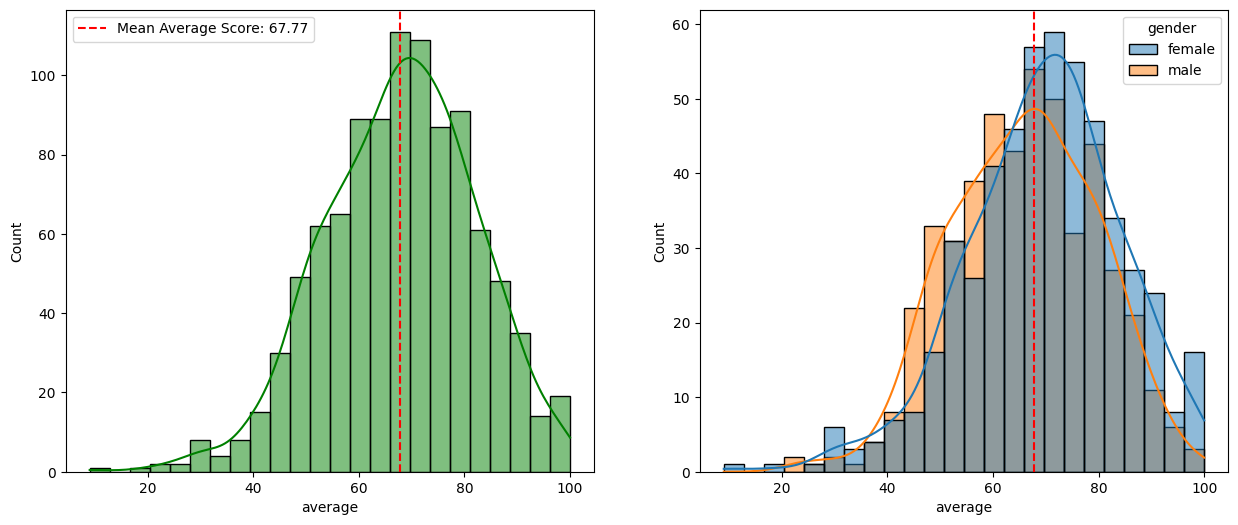

In [29]:
# calculate mean average score
mean_avg = np.mean(df['average'])

# left subplot
fix, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(ax=axs[0], data=df, x='average', kde=True, color='g')
axs[0].axvline(mean_avg, color='r', linestyle='--', label=f'Mean Average Score: {mean_avg:.2f}')
axs[0].legend()

# right subplot
sns.histplot(ax=axs[1], data=df, x='average', kde=True, hue='gender')
axs[1].axvline(mean_avg, color='r', linestyle='--', label=f'Mean Average Score: {mean_avg:.2f}')

plt.show()

### 4.1.2 Visualize Total Score Distribution

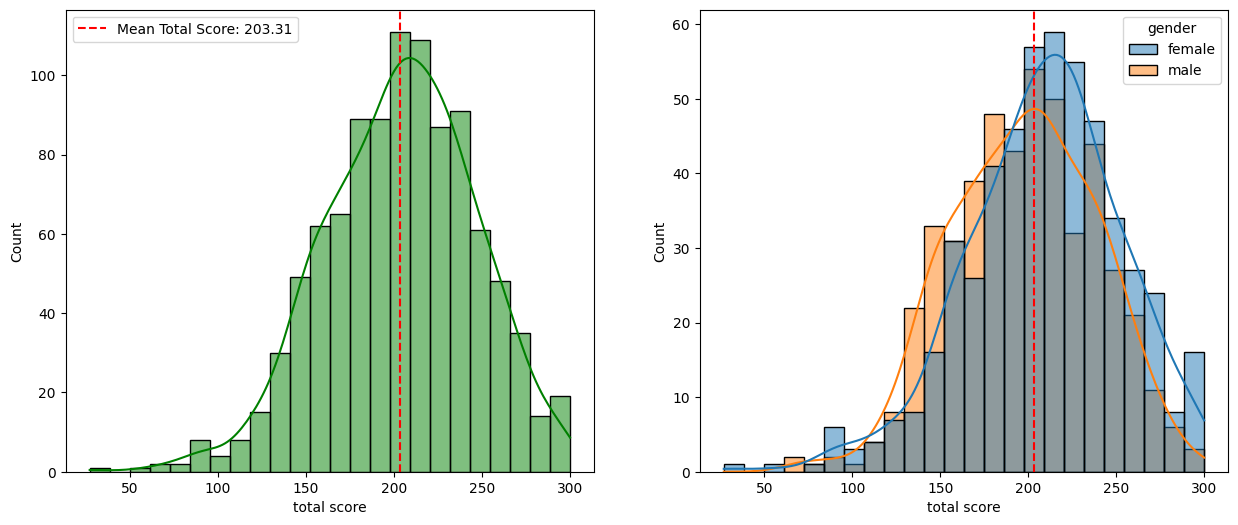

In [30]:
# get mean total score
mean_tscore = np.mean(df['total score'])

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(ax=axs[0], data=df, x='total score', kde=True, color='g')
axs[0].axvline(mean_tscore, color='r', linestyle='--', label=f'Mean Total Score: {mean_tscore:.2f}')
axs[0].legend()

sns.histplot(ax=axs[1], data=df, x='total score', kde=True, hue='gender')
axs[1].axvline(mean_tscore, color='r', linestyle='--', label=f'Mean Total Score: {mean_tscore:.2f}')

plt.show()

### Insights

- female students tend to perform better than male

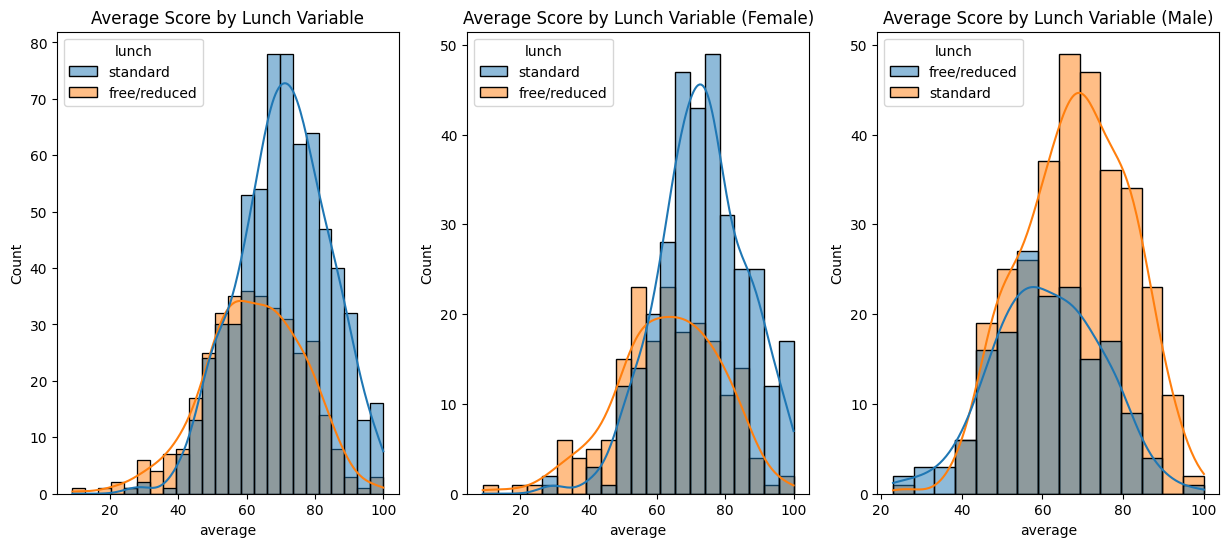

In [33]:
# visualize average by gender to confirm insight
# view in terms of lunch variable
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

sns.histplot(ax=axs[0], data=df, x='average', kde=True, hue='lunch')
axs[0].set_title('Average Score by Lunch Variable')

sns.histplot(ax=axs[1], data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')
axs[1].set_title('Average Score by Lunch Variable (Female)')

sns.histplot(ax=axs[2], data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')
axs[2].set_title('Average Score by Lunch Variable (Male)')

plt.show()